In [1]:
from astropy.coordinates import SkyCoord, UnitSphericalRepresentation
from itertools import combinations, cycle
from pyipn.io.visualization import SphericalCircle
import astropy.units as u
import numpy as np

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt



from pyipn import copy_template, Universe

# Start up

We first want to copy the template configuration to our local director so that we can edit it.


In [3]:
copy_template()

We can see how the config looks.

In [13]:
!cat template_config.yaml

## Specify the GRB parameters

grb:

  # Location and distance (degrees and Mpc)
  ra: 80.
  dec: -30.
  distance: 100.

  # lightcurve
  K: 50. # intensity
  t_rise: 1. # rise time
  t_decay: 2. # decay time


# specify the detectors
# each entry is treated as the name of the detector
detectors:

  # name the detector
  det1:

    # it's location in GCRS
    ra: 10.
    dec: 0.
    altitude: 3000. # km
    time: '2010-01-01T00:00:00' # time of detection

    # Where the detector point in the sky
    pointing:
      ra: 10.
      dec: 30.

    # the total effective area
    effective_area: 1.


  # add more detectors!
  
  det2:

    ra: 170.
    dec: -10.
    altitude: 3000.
    time: '2010-01-01T00:00:00'
    
    pointing:
      ra: 10.
      dec: 30.

    effective_area: 1.

  det3:

    ra: 20.
    dec: 40.
    altitude: 15000.
    time: '2010-01-01T00:00:00'
    
    pointing:
      ra: 20.
      dec: 70.

    effective_area: 1.

  det4:

    ra: 60.
    dec: -30.
    altitude: 1

# Make a Universe and blow up a GRB

We can load the configuration from the yaml file.

In [14]:
uni = Universe.from_yaml('template_config.yaml')

Set how long before and after the trigger time that you would like the light curve to last and create the data.

In [15]:
uni.explode_grb(tstart=-50,tstop=50)

<IPython.core.display.Javascript object>


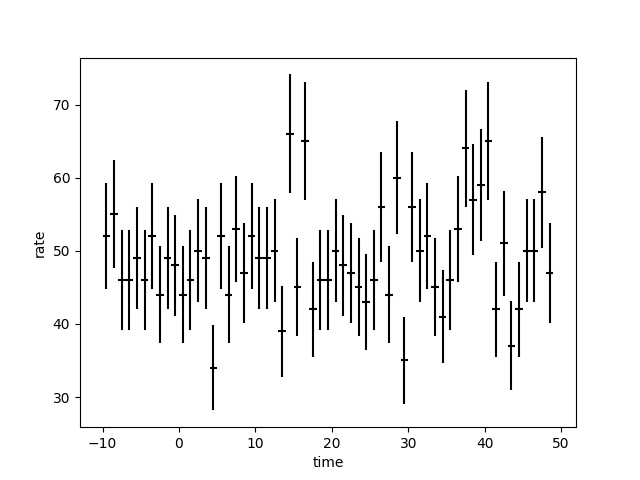

<IPython.core.display.Javascript object>


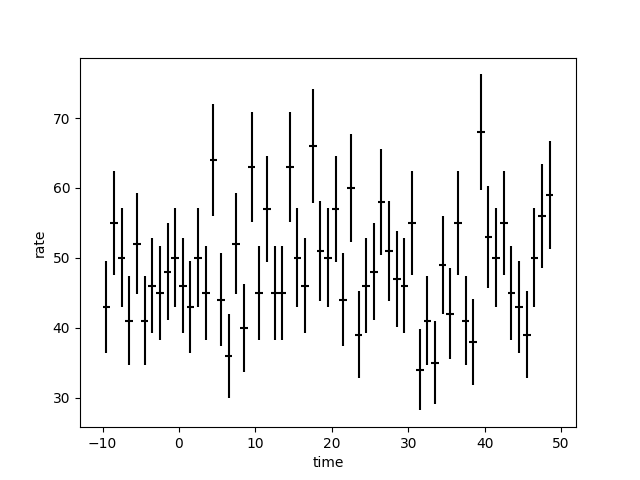

<IPython.core.display.Javascript object>


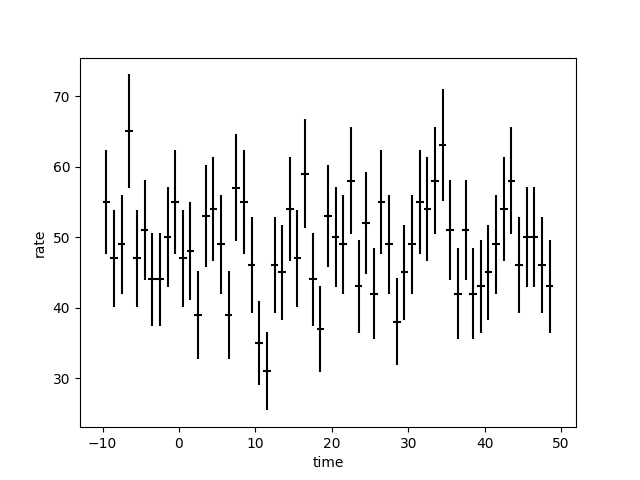

<IPython.core.display.Javascript object>


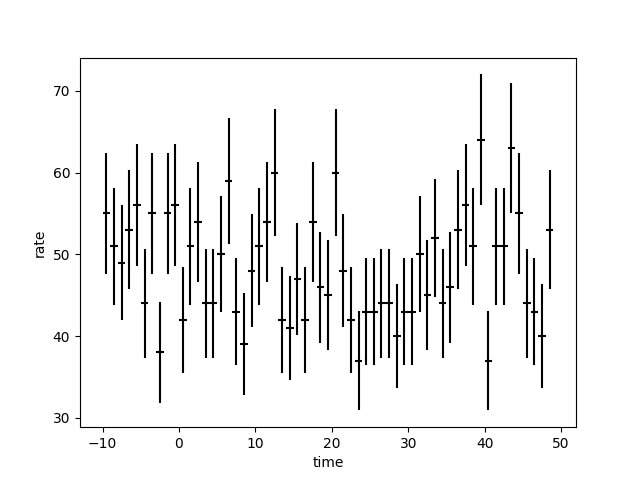

In [16]:
for det, lc in uni.light_curves.items():
    
    lc.display(-10,50,1.)
    

We can now view the light curves.

In [17]:
print(uni._time_differences)

[0.         0.05952577 0.00677445 0.00206275]


Localize GRB ra and dec using triangulation

In [18]:
G = uni.localize_GRB()
print(G.coord.represent_as(UnitSphericalRepresentation).lon.to(u.deg),
      G.coord.represent_as(UnitSphericalRepresentation).lat.to(u.deg))

80d00m00s -30d00m00s


In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt

Create data list of all triangulation circles (center point in ra,dec and radius), 
one triangulation circle arises from each combination of two detectors

In [20]:
circle_data = []
cycol = cycle('grcmk')
for (d0,d1) in combinations(uni._detectors.keys(), 2):
    (cart_vec, spherical_vec, theta) = uni.calculate_annulus(d0,d1)
    circle_data.append((spherical_vec, theta, next(cycol)))

<IPython.core.display.Javascript object>


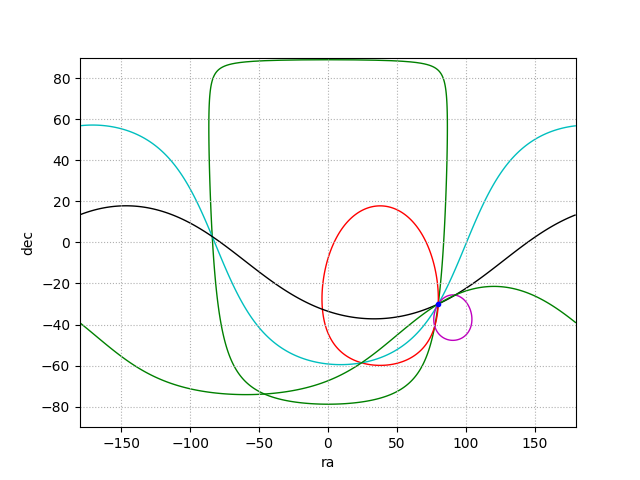

Text(0, 0.5, 'dec')

In [21]:
unit = u.deg
ax = plt.subplot(111)
ax.grid(linestyle = "dotted")
ax.set_xlim((-180. * u.deg).to_value(unit),(180. * u.deg).to_value(unit))
ax.set_ylim((-90. * u.deg).to_value(unit),(90. * u.deg).to_value(unit))
ax.set_xlabel("ra")
ax.set_ylabel("dec")

plot of circles in ra and dec

In [22]:
for (center, angle, color) in circle_data:
    circ = SphericalCircle(center, angle, resolution=1000, vertex_unit=unit,
                           edgecolor=color, facecolor='none')
    ax.add_patch(circ)

plt.plot()


[]

Show GRB location as blue dot

In [23]:
ra = uni._grb.location.coord.represent_as(UnitSphericalRepresentation).lon.to_value(unit)
dec = uni._grb.location.coord.represent_as(UnitSphericalRepresentation).lat.to_value(unit)
plt.plot(ra, dec, "b.")